In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
IMAGE_FEATURES = 28 * 28

In [4]:
def extract_data(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_FEATURES * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_FEATURES)
        return data

In [5]:
# The notMNIST dataset
# http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html
train_data = extract_data('data/train-images-idx3-ubyte.gz', 60000)
test_data = extract_data('data/t10k-images-idx3-ubyte.gz', 10000)

In [6]:
train_data.shape, test_data.shape

((60000, 784), (10000, 784))

In [7]:
label_dict = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J'
}

In [8]:
def display_image(image_pixels):
    plt.imshow(image_pixels.reshape((28, 28)), cmap='gray')
    plt.show();

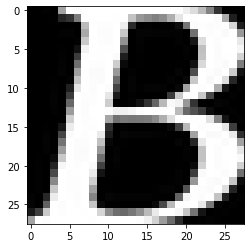

In [9]:
display_image(train_data[20])

In [10]:
train_data.dtype, test_data.dtype

(dtype('float32'), dtype('float32'))

In [11]:
np.max(train_data), np.max(test_data)

(255.0, 255.0)

In [12]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop

In [14]:
BATCH_SIZE = 128
EPOCHS = 25

In [15]:
input_img = Input(shape=(IMAGE_FEATURES,))

def autoencoder(input_img):

    encoding1 = Dense(784, activation='relu')(input_img)
    encoding2 = Dense(256, activation='relu')(encoding1)

    codings = Dense(64, activation='relu')(encoding2)

    decoding2 = Dense(256, activation='relu')(codings)
    decoding1 = Dense(784, activation='relu')(decoding2)

    return decoding1

In [16]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(optimizer=RMSprop(), loss='mse')

In [17]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               201488    
Total params: 1,050,976
Trainable params: 1,050,976
Non-trainable params: 0
___________________________________________________

In [18]:
history = autoencoder.fit(train_data, train_data,
                          epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          verbose=1,
                          validation_data=(train_data, train_data))

Epoch 1/25
469/469 [==============================] - 9s 17ms/step - loss: 0.1097 - val_loss: 0.0653
Epoch 2/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0567 - val_loss: 0.0520
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0474 - val_loss: 0.0440
Epoch 4/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0431 - val_loss: 0.0426
Epoch 5/25
469/469 [==============================] - 6s 12ms/step - loss: 0.0403 - val_loss: 0.0389
Epoch 6/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0382 - val_loss: 0.0368
Epoch 7/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0366 - val_loss: 0.0332
Epoch 8/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0353 - val_loss: 0.0324
Epoch 9/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0340 - val_loss: 0.0335
Epoch 10/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0332 - val_lo

In [19]:
pred = autoencoder.predict(test_data)
pred.shape

(10000, 784)

Original


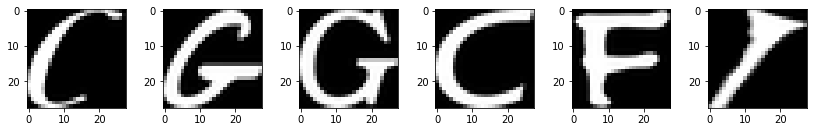

Reconstruction


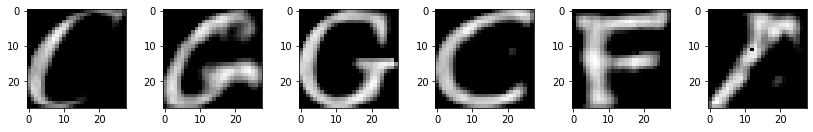

In [20]:
plt.figure(figsize=(24, 4))
print("Original")
pos = 0
for i in range(100, 106):
    plt.subplot(2, 10, pos+1)
    img = test_data[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    pos = pos + 1

plt.show()

plt.figure(figsize=(24, 4))
print("Reconstruction")

pos = 0

for i in range(100, 106):

    plt.subplot(2, 10, pos+1)
    img = pred[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    pos = pos + 1
plt.show()